In [1]:
###############################################################################
# IMPORTANDO LAS LIBRERÍAS NECESARIAS.
###############################################################################


from selenium import webdriver
from time import sleep
import re
import pandas as pd
from sqlalchemy import create_engine

# SELENIUM.

In [2]:
###############################################################################
# ABRIL: ABRIENDO LA PÁGINA.
###############################################################################


# Indico la URL y cargo el driver para la manipulación de la página.
url = 'https://jetsmart.com/cl/es/'
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(
    '/home/rafaelfarias/Dropbox/Postgrados/MDS/Almacenamiento_y_captura_de_datos/Tarea_WebScrapping/chromedriver')
driver.implicitly_wait(20)
driver.get(url)


###############################################################################
# ABRIL: CERRANDO EL POP-UP.
###############################################################################


# Se hace click en el no gracias para cerrar ese "pop-up"
cerrar = driver.find_element_by_id("onesignal-slidedown-cancel-button")
cerrar.click()


###############################################################################
# ABRIL: INGRESANDO LOS DATOS DE BÚSQUEDA.
###############################################################################


# Una vez cerrado el pop up que aparece debo revisar la clase de origen y
# destino.
origen = driver.find_element_by_class_name("dg-dummy")
destino = driver.find_element_by_class_name("dg-dummy")

# Hago click en el campo origen
sleep(3)
origen.click()
origen.send_keys("Santiago (SCL)")

# Del menú desplegable selecciono Santigo (SCL)
sleep(3)
click_origen = driver.find_element_by_class_name("dg-typing-results-list-item")
click_origen.click()

# Ahora hago click en destino
sleep(3)
click_destino =\
    driver.find_element_by_xpath(
        "/html/body/div[1]/main/div[2]/searchbox/div/div/div[1]/div/form/route-selector/div[2]/div[3]/ul/li[2]")
click_destino.click()

# Ahora debo ingresar la fecha. Primero que click en la flecha para correr el
# mes.
sleep(3)
click_flecha = driver.find_element_by_xpath(
    "/html/body/div[1]/main/div[2]/searchbox/div/div/div[1]/div/form/date-selector/div[3]/div[2]/div/div[1]/span[2]")
click_flecha.click()

# Ahora selecciona el primer día del intervalo de fecha.
sleep(3)
click_fecha_in = driver.find_element_by_xpath(
    "/html/body/div[1]/main/div[2]/searchbox/div/div/div[1]/div/form/date-selector/div[3]/div[2]/div/div[2]/div/div[2]/div[2]/span[4]")
click_fecha_in.click()

# Ahora selecciono el último día del intervalo.
sleep(3)
click_fecha_fin = driver.find_element_by_xpath(
    "/html/body/div[1]/main/div[2]/searchbox/div/div/div[1]/div/form/date-selector/div[4]/div[2]/div/div[2]/div/div[2]/div[1]/span[33]")
click_fecha_fin.click()

# Ahora le doy click al botón buscar.
sleep(3)
click_buscar = driver.find_element_by_xpath(
    "/html/body/div[1]/main/div[2]/searchbox/div/div/div[1]/div/form/div[2]/button[2]")
click_buscar.click()


###############################################################################
# ABRIL: EXTRAYENDO PRECIOS Y FECHAS IDA Y VUELTA.
###############################################################################


# El viaje redondo se analizará utilizando el día de inicio del viaje como el
# día Jue 01-04 y todas las posibles vueltas dentro del mes, excluyendo como
# retorno el día 01-04.
sleep(3)
# Loop que me permite obtener todos los datos de llegada de la página 1
for elem1 in driver.find_elements_by_xpath(
        "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]"):
    elem1 = elem1.text

# Repito el proceso 6 para cambiar de datos y repito 5 veces el proceso para
# obtener los 30 días del mes de Abril
# Proceso 1 de 5
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)

for elem2 in driver.find_elements_by_xpath(
        "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]"):
    elem2 = elem2.text
sleep(5)

# Proceso 2 de 5
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)

click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)

for elem3 in driver.find_elements_by_xpath(
        "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]"):
    elem3 = elem3.text
sleep(3)

# Proceso 3 de 5
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)

for elem4 in driver.find_elements_by_xpath(
        "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]"):
    elem4 = elem4.text
sleep(3)

# Proceso 4 de 5
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)

for elem5 in driver.find_elements_by_xpath(
        "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]"):
    elem5 = elem5.text
sleep(3)

# Proceso 5 de 5
click_anterior = driver.find_element_by_xpath(
    "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]/div[1]/i")
click_anterior.click()
sleep(2)
for elem6 in driver.find_elements_by_xpath(
        "/html/body/app/div[1]/div[2]/div/section/div/flight/div/div/flight-select-form/div/form[1]/div[1]/section/flight-fee-selector[2]/div/div[1]"):
    elem6 = elem6.text
sleep(3)


###############################################################################
# GENERANDO UN DATAFRAME CON LA DATA EXTRAÍDA.
###############################################################################


# Limpio un poco la data.
elem1 = re.sub('\n', ',', elem1)
elem2 = re.sub('\n', ',', elem2)
elem3 = re.sub('\n', ',', elem3)
elem4 = re.sub('\n', ',', elem4)
elem5 = re.sub('\n', ',', elem5)
elem6 = re.sub('\n', ',', elem6)

# Creo la lista con todos los elementos extraídos.
bd = [elem1, elem2, elem3, elem4, elem5, elem6]


b1_1 = (bd[0][4:18]).split(',')
b1_2 = (bd[1][4:18]).split(',')
b1_3 = (bd[2][4:18]).split(',')
b1_4 = (bd[3][4:18]).split(',')
b1_5 = (bd[4][4:18]).split(',')
b1_6 = (bd[5][4:18]).split(',')
b2_1 = (bd[0][23:37]).split(',')
b2_2 = (bd[1][23:37]).split(',')
b2_3 = (bd[2][23:37]).split(',')
b2_4 = (bd[3][23:37]).split(',')
b2_5 = (bd[4][23:37]).split(',')
b2_6 = (bd[5][23:37]).split(',')
b3_1 = (bd[0][42:56]).split(',')
b3_2 = (bd[1][42:56]).split(',')
b3_3 = (bd[2][42:56]).split(',')
b3_4 = (bd[3][42:56]).split(',')
b3_5 = (bd[4][42:56]).split(',')
b3_6 = (bd[5][42:56]).split(',')
b4_1 = (bd[0][61:75]).split(',')
b4_2 = (bd[1][61:75]).split(',')
b4_3 = (bd[2][61:75]).split(',')
b4_4 = (bd[3][61:75]).split(',')
b4_5 = (bd[4][61:75]).split(',')
b4_6 = (bd[5][61:75]).split(',')
b5_1 = (bd[0][80:94]).split(',')
b5_2 = (bd[1][80:94]).split(',')
b5_3 = (bd[2][80:94]).split(',')
b5_4 = (bd[3][80:94]).split(',')
b5_5 = (bd[4][80:94]).split(',')
b5_6 = (bd[5][80:94]).split(',')
b6_1 = (bd[0][99:116]).split(',')
b6_2 = (bd[1][99:116]).split(',')
b6_3 = (bd[2][99:116]).split(',')
b6_4 = (bd[3][99:116]).split(',')
b6_5 = (bd[4][99:116]).split(',')
b6_6 = (bd[5][99:116]).split(',')

bd_fechas_precios = [b1_1, b1_2, b1_3, b1_4, b1_5, b1_6,
                     b2_1, b2_2, b2_3, b2_4, b2_5, b2_6,
                     b3_1, b3_2, b3_3, b3_4, b3_5, b3_6,
                     b4_1, b4_2, b4_3, b4_4, b4_5, b4_6,
                     b5_1, b5_2, b5_3, b5_4, b5_5, b5_6,
                     b6_1, b6_2, b6_3, b6_4, b6_5, b6_6]

# Creo la base de datos.
df_precios = pd.DataFrame(bd_fechas_precios, columns=(['Fecha_regreso',
                                                       'Precio']))

# Hay algunos valores que están duplicados y son eliminados.
df_precios.drop_duplicates(subset=['Fecha_regreso'], inplace=True)

# Ordeno las fechas de menor a mayor.
df_precios.sort_values(by='Fecha_regreso', inplace=True, ascending=True,
                       ignore_index=True)

# Elimino datos que no corresponden al mes.
df_precios.drop([0, 2], axis=0, inplace=True)


###############################################################################
# ABRIL: SQLITE.
###############################################################################


# Se crea la base de datos SQL.
engine = create_engine(
    'sqlite:////home/rafaelfarias/Dropbox/Postgrados/MDS/Almacenamiento_y_captura_de_datos/Tarea_WebScrapping/data/tarea7.db',
    echo=False)
connection = engine.raw_connection()
df_precios.to_sql('precios_fechas', connection, index=False)


###############################################################################
# ABRIL: CONSULTA SQL.
###############################################################################


# Realizo la consulta para obtener el valor mínimo. Que en combinación con el
# valor de IDA siempre dará el mínimo valor del viaje completo.

consulta = pd.read_sql("SELECT MIN(Precio) AS minimum  FROM precios_fechas",
                       connection)

# Ahora traigo todos los días con el valor mínimo que sumado al día de IDA
# siempre se obtendrá el total ida y vuelta menor.
consulta2 = pd.read_sql("SELECT * FROM precios_fechas WHERE (Precio) = (SELECT MIN(Precio) FROM precios_fechas)",
                        connection)

In [3]:
# Dataframe con los precios de vuelta obtenidos. Se toma el supuesto que no
# vuelve el mismo día.
df_precios

,Fecha_regreso,Precio
1,02-04,$ 15.000
3,03-04,$ 15.000
4,04-04,$ 38.000
5,05-04,$ 28.000
6,06-04,$ 15.000
7,07-04,$ 15.000
8,08-04,$ 15.000
9,09-04,$ 15.000
10,10-04,$ 15.000
11,11-04,$ 15.000


In [4]:
# Consulta para identificar el valor de retorno menor.
consulta

,minimum
0,$ 15.000


In [5]:
# Consulta para obtener todas las fechas de retorno más económicas.
consulta2

,Fecha_regreso,Precio
0,02-04,$ 15.000
1,03-04,$ 15.000
2,06-04,$ 15.000
3,07-04,$ 15.000
4,08-04,$ 15.000
5,09-04,$ 15.000
6,10-04,$ 15.000
7,11-04,$ 15.000
8,12-04,$ 15.000
9,13-04,$ 15.000


# TWEETER

In [6]:
###############################################################################
# TWEETER.
###############################################################################


import collections
import tweepy
import string
from nltk.corpus import stopwords
import nltk
import itertools
import matplotlib.pyplot as plt

nltk.download('stopwords')


###############################################################################
# API
###############################################################################


consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_token_secret = 'xxx'


# Seteando la API:
def twitter_setup():
    # Llaves de autenticación.:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # Devuelve API autenticado:
    api = tweepy.API(auth, wait_on_rate_limit=True)
    return api


# Declaro usuario que usaré más adelante.
usuario_principal = 'DFinanciero'


###############################################################################
# EXTRACCIÓN DE TWEETS
###############################################################################


# Se crea el objeto que extraerá la info:
extractor = twitter_setup()

# Se crea la lista de tweets:
tweets = tweepy.Cursor(extractor.user_timeline,
                       screen_name=usuario_principal).items(1000)

# Se crea el df:
df_tweets = pd.DataFrame(data=[tweet.text for tweet in tweets],
                         columns=['Tweets'])
df_tweets.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rafaelfarias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweets
0,#LoMásLeído | Fondos E y D caen fuerte desde l...
1,#LoMásLeído | Las opciones financieras que est...
2,# LoMásLeído | VTR lanza nuevo servicio de tel...
3,# LoMásLeído | Santander lleva a Gonzalo Vial ...
4,#LoMásLeído | Los movimientos de la acción de ...


In [7]:
###############################################################################
# ANÁLISIS DE FRECUENCIA DE PALABRAS.
###############################################################################


# Limpieza y Stopwords

def clean_text(text):
    # Removiendo la puntuación
    text = text.translate(string.punctuation)

    # Se lleva los tweets a minúscula y se tokenizan.
    text = text.lower().split()

    # Se eliminan los "stops words"
    stops = set(stopwords.words("spanish"))
    text = [w for w in text if not w in stops and len(w)]
    return text


# Se recorre toda la columna Tweets aplicando la función clean_text
df_tweets['Tweets'] = df_tweets['Tweets'].\
    map(lambda x:clean_text(x))

# Quedaron algunas palabras que hay que seguir limpiando.
stop = ['@presidencia_cl', '[vivo]', 'rt', 'pdte', '2', '@sebastianpinera',
        '@', '@presidencia_cl:', '@sebastianpinera,', '@gobiernodechile:',
        '-', 'of', 'q', '_', '+', 'e...', 'a...', 'de...', 's...', 'y.,.',
        'tras', 'd...', '[en', 'vivo]', 'x', '#lomásleído', '#dfmas',
        '|', '🔑#dffull', '#dffull', '$', '4', '5', 'us$', 'df', '🧫covid-19',
        'chile:', '24', 'si', 'tres', '2020']

df_tweets['Tweets'] = df_tweets['Tweets'].\
    map(lambda x:[item for item in x if item not in stop])

# Lista de todas las palabras.
palabras_todas = list(itertools.chain(*df_tweets['Tweets']))

# Se crea el contador de palabras
cuenta_palabras = collections.Counter(palabras_todas)

# Se crea el df que contiene las palabras.
df_palabras = pd.DataFrame(cuenta_palabras.most_common(100),
                           columns=['palabras', 'cantidad'])

df_palabras.head()

,palabras,cantidad
0,chile,75
1,nuevo,43
2,mercado,43
3,cobre,41
4,alza,39


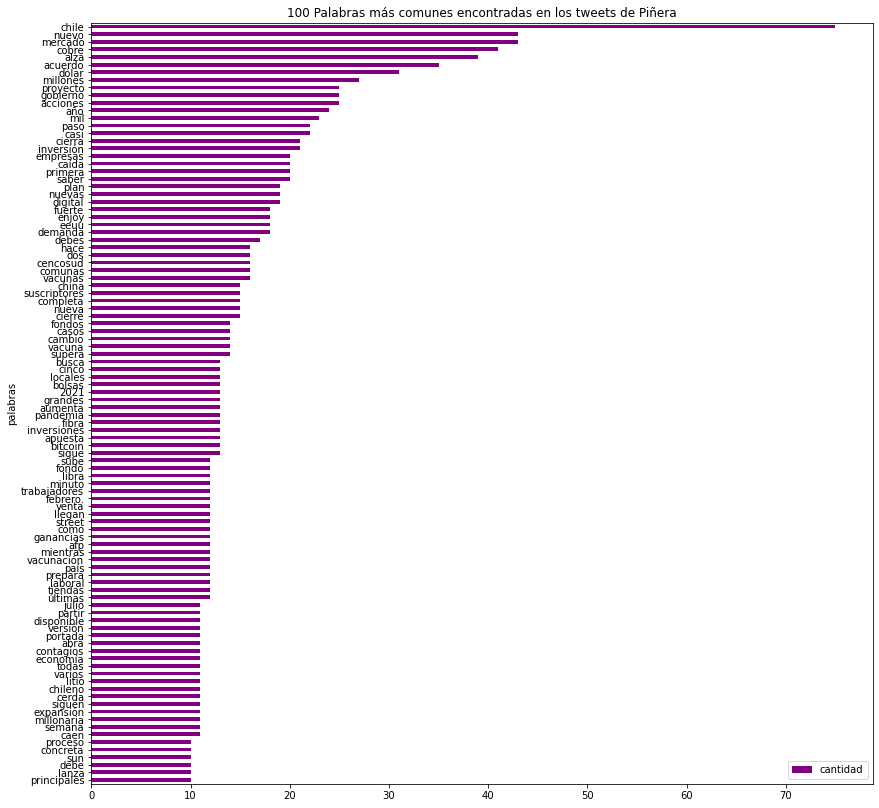

In [8]:
# Se grafica.
fig, ax = plt.subplots(figsize=(14, 14))

# Gráfico horizontal.
df_palabras.sort_values(by='cantidad').plot.barh(x='palabras',
                                                 y='cantidad',
                                                 ax=ax,
                                                 color="purple")
ax.set_title("100 Palabras más comunes encontradas en los tweets de Piñera")
plt.show()

In [9]:
###############################################################################
# EXTRACCIÓN DE SEGUIDOS DE PIÑERA.
###############################################################################


# Se crea el objeto que extraerá los seguidos:
extractor2 = twitter_setup()

# Se listan los amigos:
amigos = tweepy.Cursor(extractor2.friends,
                       id=usuario_principal).items(100)

# Se crea el df_amigos.
df_amigos = pd.DataFrame(data=[friends.id for friends in amigos],
                         columns=['amigos'])

# Se crea la lista que nos permitirá iterar.
lista_de_amigos = df_amigos['amigos'].tolist()

# Loop para encontrar los 10 tweets de los 100 usuarios seguidos.
df_final = pd.DataFrame()
for i in range(0, 99):
    tweets = tweepy.Cursor(extractor2.user_timeline,
                           id=lista_de_amigos[i]).items(10)

    df_tweets_amigos = pd.DataFrame(data=[tweet.text for tweet in tweets],
                                    columns=['Tweets'])
    # df_final = df_tweets_amigos.append(df_tweets_amigos)
    df_final = df_final.append(df_tweets_amigos)
    
# Se muestra el head del df de tweets de seguidos
df_final.head()

,Tweets
0,🛒🛍🖱 #Las3Claves: ¿En apenas dos días? #Falabel...
1,👥💻😞 #Las3Claves: Cómo evitar la fatiga de Zoom...
2,🛒🖱💸 #Las3Claves: más https://t.co/JfD8Qbow4d\n...
3,🛒🖱💸 #Las3Claves: #Yapo se creó en 2011 y suma ...
4,RT @subtel_chile: 🔴@VTRchile reporta incidenci...


In [10]:
# Se muestra el df de amigos de piñera.
df_amigos.head()

,amigos
0,1283923947667558400
1,718424298034241536
2,104871608
3,1451901955
4,803694179079458816


In [11]:
###############################################################################
# ANÁLISIS DE FRECUENCIA DE PALABRAS.
###############################################################################


# Limpieza y Stopwords
# Se recorre toda la columna Tweets aplicando la función clean_text
df_final['Tweets'] = df_final['Tweets'].\
    map(lambda x:clean_text(x))

# Quedaron algunas palabras que hay que seguir limpiando.
stop = ['@presidencia_cl', '[vivo]', 'rt', 'pdte', '2', '@sebastianpinera',
        '@', '@presidencia_cl:', '@sebastianpinera,', '@gobiernodechile:',
        '-', 'of', 'q', 'https://', 'https://t.co/yrxme7dw6k',
        'https://t.co/sj3fapuhdh', 'https://t.co/rjfmcwrkk1',
        'https://t.co/fzbheccdlx', 'https://t.co/biruccqpvb',
        'https://t.co/cpbsvugtyk', 'https://t.co/fgb36ictit',
        'https://t.co/rz8jaxf5uw', 'https://t.co/eofq7xmsed',
        '#sigamosaprendiendo', 'https://t.co/26g2tizxwd', '1.8',
        '2.092.453', 'hola,', '|', '@potus:', '5', 'd…', 'la...',
        'la…', '@vtrsoporte', 'a…', 'l…', '🙌🏻', '2021', 's.a.;',
        '#las3claves:', 'p…', '#fcab', '#dfmas', 'it’s', '@meconomia:',
        '&amp;', '#covid19', 'us', '@sodimacayuda', 'dm.', 'si']

df_final['Tweets'] = df_final['Tweets'].\
    map(lambda x:[item for item in x if item not in stop])


# Limpieza de stopwords en inglés.
def clean_text_english(text):
    # Se eliminan los "stops words"
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w)]
    return text


df_final['Tweets'] = df_final['Tweets'].\
    map(lambda x:clean_text_english(x))

# Lista de todas las palabras.
palabras_todas2 = list(itertools.chain(*df_final['Tweets']))

# Se crea el contador de palabras
cuenta_palabras2 = collections.Counter(palabras_todas2)

# Se crea el df que contiene las palabras.
df_palabras2 = pd.DataFrame(cuenta_palabras2.most_common(100),
                            columns=['palabras', 'cantidad'])

df_palabras2.head()

,palabras,cantidad
0,hoy,30
1,hola,28
2,chile,21
3,junto,19
4,invitamos,19


/home/rafaelfarias/miniconda3/envs/webscrapping/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128073 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rafaelfarias/miniconda3/envs/webscrapping/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128240 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rafaelfarias/miniconda3/envs/webscrapping/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128073 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/rafaelfarias/miniconda3/envs/webscrapping/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128240 missing from current font.
  font.set_text(s, 0, flags=flags)


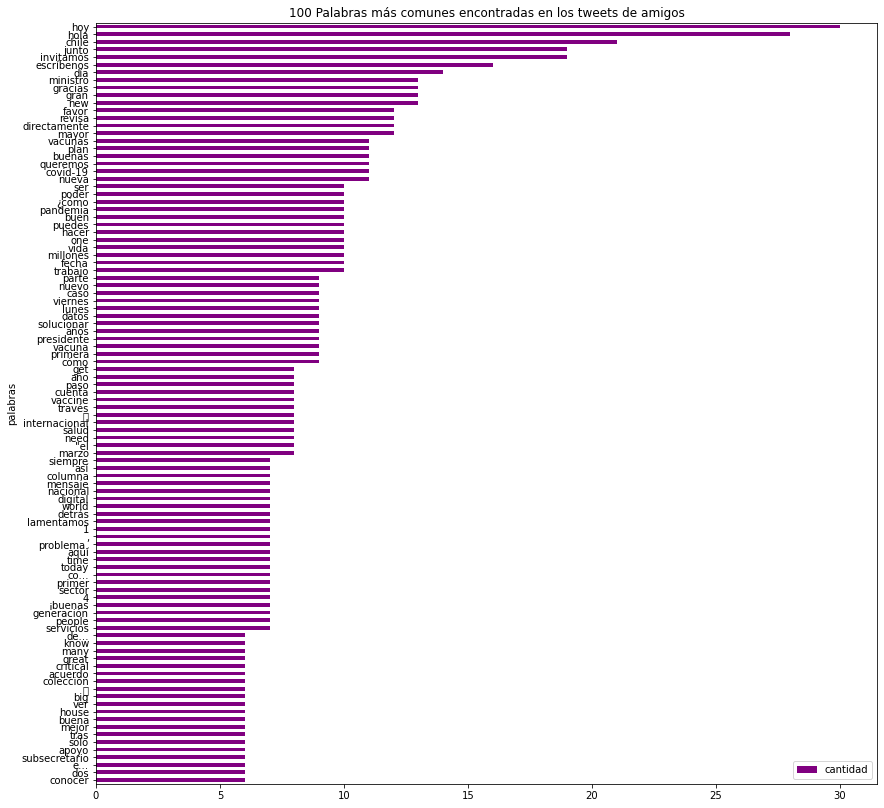

In [12]:
# Se grafica.
fig2, ax2 = plt.subplots(figsize=(14, 14))

# Gráfico horizontal.
df_palabras2.sort_values(by='cantidad').plot.barh(x='palabras',
                                                  y='cantidad',
                                                  ax=ax2,
                                                  color="purple")
ax2.set_title("100 Palabras más comunes encontradas en los tweets de amigos")
plt.show()